# 서브 클래스

In [1]:
%cd /home/alpaco/mys/oshLecture/1day/

/home/alpaco/mys/oshLecture/1day


In [2]:
import pandas as pd
df = pd.read_csv('./data/wine.csv')
display(df) # 6497 rows × 13 columns
print('hello')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


hello


In [3]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'class'],
      dtype='object')

<Axes: >

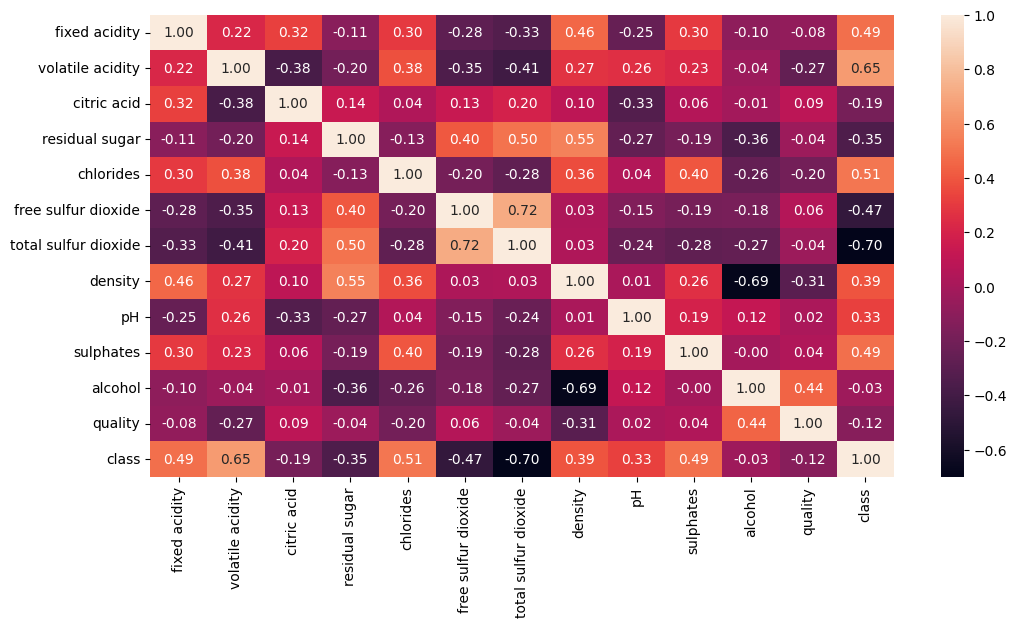

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

#시본을 이용해서 그래프를 그린다. 이때, df.corr()은 컬럼 대 컬럼으로 모든 상관계수를 구한다.
plt.figure(figsize=(12,6))
sns.heatmap(data=df.corr(), annot=True, fmt='.2f')
# 상관계수는 -1~1 사이의 값을 가진다.
# -1에 가까울 수록 음의 상관관계(방향반대) : 돈쓰는횟수 vs 통장 잔고
# 1에 가까울 수록 양의 상관관계(둘다상승) : 야식횟수 vs 몸무게
# 0에 가까울수록 관계약함. 
# 보통 0.25 수준으로 거름 *스레쉬홀드 0.25

In [5]:
y = df['alcohol']
X = df[['residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'quality']] # 여러 개 넣을 떈 브라켓을 해야한다.

# 피어슨 상관관계를 통한 데이터 필터링 변수 선택 -> feature selection
# 참고로, 상관관계(코릴레이션)로 변수를 선택하는 경우도 있다. , 다중공선성(X_1와 X_2가 서로 상관이 쎄서 학습을 방해)을 보기도 한다.
# (VIF팽창계수 > 10),, 다만, 의사결정나무 계열들은 다중곤선성에 영향이 없다.
# 그럴땐 corr을 선택해야 겠죠?

In [6]:
df.isna()
# True는 1, False는 2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,False,False,False,False,False,False,False,False,False,False,False,False,False
6493,False,False,False,False,False,False,False,False,False,False,False,False,False
6494,False,False,False,False,False,False,False,False,False,False,False,False,False
6495,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isna().sum()
X.isnull().sum() #결측치 확인
X.isna().sum() # 같은 코드임.

residual sugar          0
chlorides               0
total sulfur dioxide    0
density                 0
quality                 0
dtype: int64

In [8]:
# 결측치가 없지만 결측치 갯수 비율 보는 법
df.isna().sum()/len(df)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
class                   0.0
dtype: float64

In [9]:
# 나의 답
# for i in X:
#     if df[i].isna().sum :
#         df[i].fillna(df[i].mean(), inplace=True)
# display(df.isna().sum())

# 모든 각 컬럼의 결측치를 각 컬럼의 평균 값으로 채움.
X.fillna(X.mean(), inplace=True)
# 한 컬럼에 대해서만 수정할 땐
# X['컬럼명'].fillna(X['컬럼명'].mean(), inplace=True)


/tmp/ipykernel_71767/598296134.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(y_train)



(4872, 5) (4872,)
(1625, 5) (1625,)
1539     9.9
1109    10.8
100     10.2
5477     9.4
6416    11.2
        ... 
3772     9.2
5191    10.7
5226     9.5
5390     9.5
860      9.5
Name: alcohol, Length: 4872, dtype: float64


In [11]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
X_train_scailed = rs.fit_transform(X_train)
X_valid_scailed = rs.transform(X_valid)


In [12]:

from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor(max_depth=7)
DT.fit(X_train_scailed, y_train)

DecisionTreeRegressor(max_depth=7)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = DT.predict(X_valid_scailed)
mse = mean_squared_error(y_valid, y_pred)
print("Valid Mean_squared_error : ",mse)
r2 = r2_score(y_valid, y_pred)
print("R2 Score : " ,r2)

Valid Mean_squared_error :  0.43339610223371533
R2 Score :  0.6919835499070399


# 숙제

도식화하기 + 전력사용량 예측

## 데이터셋 준비 및 확인

In [14]:
%cd /home/alpaco/mys/oshLecture/1day/
import pandas as pd

df = pd.read_csv('./data/train.csv')
display(df) #204000 rows × 10 columns
display(df.columns)

/home/alpaco/mys/oshLecture/1day


,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40
...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,20220824 19,23.1,NaN,0.9,86.0,0.5,NaN,881.04
203996,100_20220824 20,100,20220824 20,22.4,NaN,1.3,86.0,0.0,NaN,798.96
203997,100_20220824 21,100,20220824 21,21.3,NaN,1.0,92.0,NaN,NaN,825.12
203998,100_20220824 22,100,20220824 22,21.0,NaN,0.3,94.0,NaN,NaN,640.08


Index(['num_date_time', '건물번호', '일시', '기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)',
       '일조(hr)', '일사(MJ/m2)', '전력소비량(kWh)'],
      dtype='object')

In [15]:
df.isnull().sum() #강수량160069, 풍속19, 습도9, 일조 75182, 일사87913

num_date_time         0
건물번호                  0
일시                    0
기온(C)                 0
강수량(mm)          160069
풍속(m/s)              19
습도(%)                 9
일조(hr)            75182
일사(MJ/m2)         87913
전력소비량(kWh)            0
dtype: int64

## 데이터셋 전처리

In [16]:
df = df.drop(['num_date_time','강수량(mm)','일조(hr)', '일사(MJ/m2)'], axis=1)
display(df.head())
display(df.isna().sum())
df.dtypes

,건물번호,일시,기온(C),풍속(m/s),습도(%),전력소비량(kWh)
0,1,20220601 00,18.6,0.9,42.0,1085.28
1,1,20220601 01,18.0,1.1,45.0,1047.36
2,1,20220601 02,17.7,1.5,45.0,974.88
3,1,20220601 03,16.7,1.4,48.0,953.76
4,1,20220601 04,18.4,2.8,43.0,986.40


건물번호           0
일시             0
기온(C)          0
풍속(m/s)       19
습도(%)          9
전력소비량(kWh)     0
dtype: int64

건물번호            int64
일시             object
기온(C)         float64
풍속(m/s)       float64
습도(%)         float64
전력소비량(kWh)    float64
dtype: object

In [17]:
df['풍속(m/s)'].fillna(df['풍속(m/s)'].mean(), inplace=True)
df['습도(%)'].fillna(df['습도(%)'].mean(), inplace=True)
df.isnull().sum() #풍속19, 습도9

/tmp/ipykernel_71767/4218398533.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['풍속(m/s)'].fillna(df['풍속(m/s)'].mean(), inplace=True)
/tmp/ipykernel_71767/4218398533.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

건물번호          0
일시            0
기온(C)         0
풍속(m/s)       0
습도(%)         0
전력소비량(kWh)    0
dtype: int64

In [18]:
# 일시 값을 연, 월, 일, 시로 분리
df["월"] = df["일시"].str[4:6].astype(int)
df["일"] = df["일시"].str[6:8].astype(int)
df["시"] = df["일시"].str[9:].astype(int)

# 일시 컬럼 제거
df = df.drop("일시", axis=1)

# 결과 확인
df

,건물번호,기온(C),풍속(m/s),습도(%),전력소비량(kWh),월,일,시
0,1,18.6,0.9,42.0,1085.28,6,1,0
1,1,18.0,1.1,45.0,1047.36,6,1,1
2,1,17.7,1.5,45.0,974.88,6,1,2
3,1,16.7,1.4,48.0,953.76,6,1,3
4,1,18.4,2.8,43.0,986.40,6,1,4
...,...,...,...,...,...,...,...,...
203995,100,23.1,0.9,86.0,881.04,8,24,19
203996,100,22.4,1.3,86.0,798.96,8,24,20
203997,100,21.3,1.0,92.0,825.12,8,24,21
203998,100,21.0,0.3,94.0,640.08,8,24,22


In [19]:
df.columns = ["building_no", "temperature", "wind_speed", "humidity", "power_consumption", "month", "day", "hour"]

## 히트맵 상관관계 분석

<Axes: >

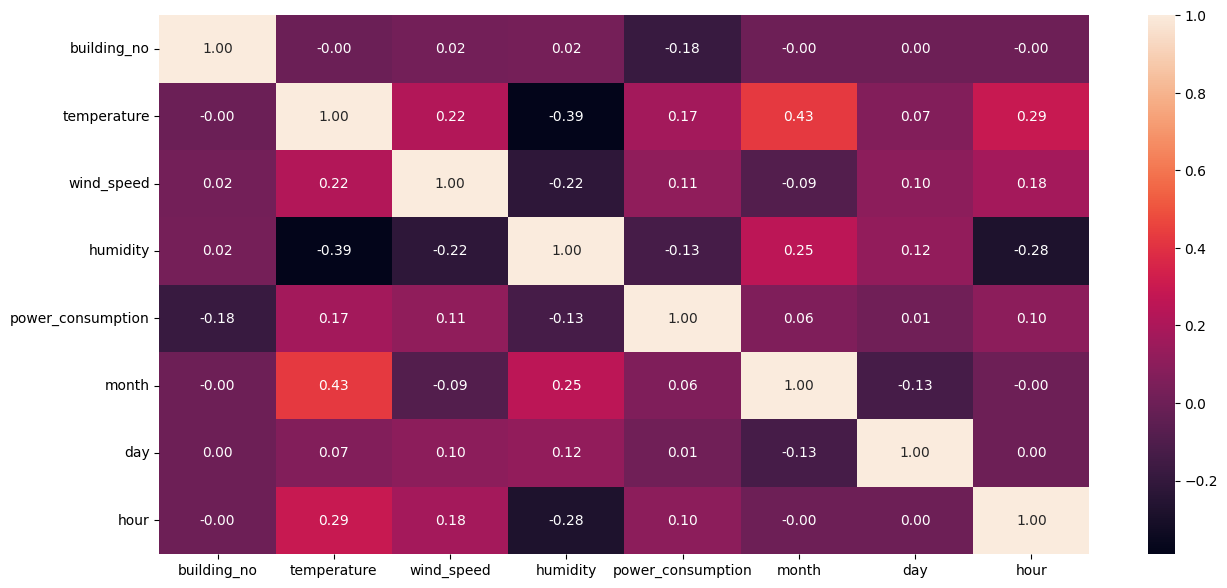

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,7))
plt.style.use('default')
sns.heatmap(data=df.corr(), annot=True, fmt='.2f')
#"building_no", "temperature", "wind_speed", "humidity", "power_consumption", "hour" 이 관계 있는것으로 예상됨.

## 피쳐 추출

In [21]:
X = df[["building_no", "temperature", "wind_speed", "humidity", "hour"]]
y = df['power_consumption']

In [22]:
display(X.head(), y.head())

,building_no,temperature,wind_speed,humidity,hour
0,1,18.6,0.9,42.0,0
1,1,18.0,1.1,45.0,1
2,1,17.7,1.5,45.0,2
3,1,16.7,1.4,48.0,3
4,1,18.4,2.8,43.0,4


0    1085.28
1    1047.36
2     974.88
3     953.76
4     986.40
Name: power_consumption, dtype: float64

## train valid 분리

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(y_train)

(163200, 5) (163200,)
(40800, 5) (40800,)
48018     9222.00
79010      654.24
118547    2938.68
163097    1863.36
26697     2310.72
           ...   
119879     763.20
103694    3693.24
131932     301.14
146867    1742.94
121958    3042.72
Name: power_consumption, Length: 163200, dtype: float64


## 리스케일링

In [24]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
X_train_scailed = rs.fit_transform(X_train)
X_valid_scailed = rs.transform(X_valid)
#데이터 프레임이 array로 나오는군
display(X_valid)
X_valid_scailed

,building_no,temperature,wind_speed,humidity,hour
184895,91,23.8,0.3,99.0,23
187594,92,28.8,1.2,75.0,10
119228,59,26.4,3.2,83.0,20
148570,73,24.3,1.3,85.0,10
150165,74,25.1,2.1,83.0,21
...,...,...,...,...,...
90934,45,26.0,2.2,78.0,22
39625,20,27.9,0.7,69.0,1
178855,88,25.5,2.7,72.0,7
137902,68,24.1,1.5,80.0,22


array([[ 0.81632653, -0.40425532, -1.0625    ,  0.81818182,  1.        ],
       [ 0.83673469,  0.65957447, -0.5       , -0.27272727, -0.18181818],
       [ 0.16326531,  0.14893617,  0.75      ,  0.09090909,  0.72727273],
       ...,
       [ 0.75510204, -0.04255319,  0.4375    , -0.40909091, -0.45454545],
       [ 0.34693878, -0.34042553, -0.3125    , -0.04545455,  0.90909091],
       [ 0.06122449,  0.12765957, -0.1875    ,  0.77272727,  1.        ]])

## 모델 학습 및 추론

In [44]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor(max_depth=10)
DT.fit(X_train_scailed, y_train)
y_pred = DT.predict(X_valid_scailed)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
mse = mean_squared_error(y_valid, y_pred)
print("Valid Mean_squared_error : ", mse)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("Valid RMean_squared_error : ", rmse)
r2 = r2_score(y_valid, y_pred)
print("R2 Score : " ,r2)

Valid Mean_squared_error :  430212.00139476225
Valid RMean_squared_error :  655.9054820587813
R2 Score :  0.927240015579207
